In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost as xg
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

In [2]:
path = "C:/Workspace/Project/baron/05_Loop current Events"
file = ["2015-08-07","2015-08-08","2015-09-03","2015-09-09"]
dfs = []
for i in range(4):
    filenames = glob.glob(path + "/" + file[i] + "/*.txt")
    cols = []
    for filename in filenames:
        cols.append(pd.read_csv(filename, index_col=None, header=None))
    df = pd.DataFrame(pd.concat(cols, axis=1, ignore_index=None))
    df.columns = ['AIRGAP1' , 'AIRGAP2' , 'AIRGAP3' , 'AIRGAP4' , 'CURRENT_DEPTH1' ,
              'CURRENT_DEPTH2' , 'CURRENT_DEPTH3' , 'CURRENT_DEPTH4' , 'CURRENT_DEPTH5' ,
              'CURRENT_DEPTH6' , 'CURRENT_DEPTH7' , 'CURRENT_DIRECTION1' , 'CURRENT_DIRECTION2' , 
              'CURRENT_DIRECTION3' , 'CURRENT_DIRECTION4' , 'CURRENT_DIRECTION5' , 'CURRENT_DIRECTION6' , 
              'CURRENT_DIRECTION7' , 'CURRENT_SPEED1' , 'CURRENT_SPEED2' , 'CURRENT_SPEED3' , 'CURRENT_SPEED4' ,
              'CURRENT_SPEED5' , 'CURRENT_SPEED6' , 'CURRENT_SPEED7' , 'MOORING1_LENGTH',  'MOORING1_TENSION1' ,
              'MOORING1_TENSION2' , 'MOORING2_LENGTH' , 'MOORING2_TENSION1' , 'MOORING2_TENSION2' ,
              'MOORING3_LENGTH' , 'MOORING3_TENSION1' , 'MOORING3_TENSION2' , 'MOORING4_LENGTH' ,
              'MOORING4_TENSION1' , 'MOORING4_TENSION2' , 'MOORING5_LENGTH' , 'MOORING5_TENSION1' ,
              'MOORING5_TENSION2' , 'MOORING6_LENGTH' , 'MOORING6_TENSION1' , 'MOORING6_TENSION2' ,
              'MOORING7_LENGTH' , 'MOORING7_TENSION1' , 'MOORING7_TENSION2' , 'MOORING8_LENGTH' , 
              'MOORING8_TENSION1' , 'MOORING8_TENSION2' , 'MOORING9_LENGTH' , 'MOORING9_TENSION1' ,
              'MOORING9_TENSION2' , 'MOTION_TILTX' , 'MOTION_TILTY' , 'MOTION_YAW' , 'POSITION_X' ,
              'POSITION_Y' , 'WIND1_DIRECTION' , 'WIND1_SPEED' , 'WIND2_DIRECTION' , 'WIND2_SPEED']
    df = df.drop(['CURRENT_DEPTH1' , 'CURRENT_DEPTH2' , 'CURRENT_DEPTH3' , 'CURRENT_DEPTH4' ,
                'CURRENT_DEPTH5' , 'CURRENT_DEPTH6' , 'CURRENT_DEPTH7','MOORING1_LENGTH','MOORING2_LENGTH','MOORING3_LENGTH','MOORING4_LENGTH','MOORING5_LENGTH','MOORING6_LENGTH','MOORING7_LENGTH','MOORING8_LENGTH','MOORING9_LENGTH'],axis=1)
    dfs.append(df)
df1 = dfs[0]
df2 = dfs[1]
df3 = dfs[2]
df4 = dfs[3]

In [3]:
df3 = df3.drop(['MOORING1_TENSION2','MOORING2_TENSION1','MOORING2_TENSION2','MOORING3_TENSION1','MOORING3_TENSION2','MOORING4_TENSION1','MOORING4_TENSION2','MOORING5_TENSION1','MOORING5_TENSION2','MOORING6_TENSION1','MOORING6_TENSION2','MOORING7_TENSION1','MOORING7_TENSION2','MOORING8_TENSION1','MOORING8_TENSION2','MOORING9_TENSION1','MOORING9_TENSION2'],axis=1)
X = df3.drop(["MOORING1_TENSION1"],axis=1)
y = df3["MOORING1_TENSION1"]
# 그래서 요거 df3만 트레인하는거? ㅇㅇ? ㅇㅇㅇㅇ???===3 =3=3=3
X_train = X.iloc[:69120,]
y_train = y.iloc[:69120,]
X_test = X.iloc[69120:,]
y_test = y.iloc[69120:,]

In [ ]:
param_grid = {
    'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
    'epsilon': [0, 0.1, 0.2, 0.3],
    'C': [1, 10, 100],
}

In [ ]:
estimator = LinearSVR()

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(random_state=30,
           n_splits=5,
           shuffle=True,
          )

In [ ]:
# define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [19]:
# X = df3.drop(["MOORING1_TENSION1"],axis=1)
# y = df3["MOORING1_TENSION1"]
# # 그래서 요거 df3만 트레인하는거? ㅇㅇ? ㅇㅇㅇㅇ???===3 =3=3=3
# X_train = X.iloc[:69120,]
# y_train = y.iloc[:69120,]
# X_test = X.iloc[69120:,]
# y_test = y.iloc[69120:,]
xg_model = LinearSVR(C= 100, epsilon=0, loss= 'squared_epsilon_insensitive',max_iter=15000)
xg_model.fit(X_train,y_train)

C:\Users\CPB06GameN\.conda\envs\hj\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(C=100, epsilon=0, loss='squared_epsilon_insensitive', max_iter=15000)

In [20]:
r_sq_train = xg_model.score(X_train,y_train)
r_sq_test = xg_model.score(X_test,y_test)
print(r_sq_train,r_sq_test)

0.9429417574918473 0.9345018932557893


In [27]:
# 새로운 모델 돌릴때 써라
df4 = df4.drop(['MOORING1_TENSION2','MOORING2_TENSION1','MOORING2_TENSION2','MOORING3_TENSION1','MOORING3_TENSION2','MOORING4_TENSION1','MOORING4_TENSION2','MOORING5_TENSION1','MOORING5_TENSION2','MOORING6_TENSION1','MOORING6_TENSION2','MOORING7_TENSION1','MOORING7_TENSION2','MOORING8_TENSION1','MOORING8_TENSION2','MOORING9_TENSION1','MOORING9_TENSION2'],axis=1)
X = df4.drop(["MOORING1_TENSION1"],axis=1)
y = df4["MOORING1_TENSION1"]
X_train = X.iloc[:69120,]
y_train = y.iloc[:69120,]
X_test = X.iloc[69120:,]
y_test = y.iloc[69120:,]

In [28]:
predictions = xg_model.predict(X_test)

In [29]:
print(explained_variance_score(predictions,y_test))

-1.4958068767350814


In [10]:
num1 = np.linspace(0,17279,17280)
num2 = np.linspace(0,69119,69120)

(500.0, 550.0)

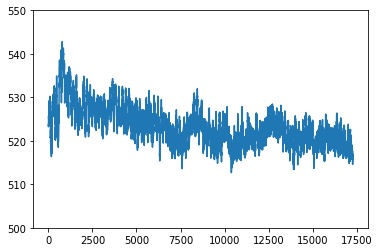

In [33]:
plt.plot(num1,predictions)
plt.ylim(500,550)

<AxesSubplot:>

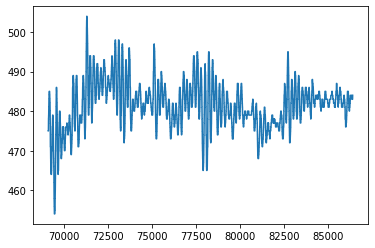

In [31]:
y_test.plot()